Импорт библиотек для анализа данных и обучения модели

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

Загрузка данных в среду Jupyter Notebook

In [2]:
!gdown 1bhH6DR0qxrhcA4OmUUhybHFJ_I3vDV3P

Downloading...
From: https://drive.google.com/uc?id=1bhH6DR0qxrhcA4OmUUhybHFJ_I3vDV3P
To: /content/ebw_data.csv
100% 2.77k/2.77k [00:00<00:00, 4.55MB/s]


In [3]:
df = pd.read_csv('ebw_data.csv')

In [4]:
df.head()

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


In [5]:
df

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48
...,...,...,...,...,...,...
67,44,146,9.0,60,1.20,1.72
68,45,146,9.0,60,1.36,1.76
69,45,146,9.0,60,1.28,1.76
70,45,146,9.0,60,1.28,1.76


Обзор данных

In [6]:
df.shape

(72, 6)

In [7]:
df.describe()

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


In [9]:
for column in df:
  print(f'{column}: количество уникальных значений: {df[column].nunique()}, {df[column].dtype}')

IW: количество уникальных значений: 7, int64
IF: количество уникальных значений: 8, int64
VW: количество уникальных значений: 5, float64
FP: количество уникальных значений: 5, int64
Depth: количество уникальных значений: 29, float64
Width: количество уникальных значений: 25, float64


In [10]:
features = df.iloc[:,:-2]

In [11]:
features[features.duplicated()]

,IW,IF,VW,FP
1,47,139,4.5,80
2,47,139,4.5,80
3,47,139,4.5,80
5,45,140,4.5,80
6,45,140,4.5,80
7,45,140,4.5,80
9,45,140,8.0,80
10,45,140,8.0,80
11,45,140,8.0,80
13,45,141,10.0,80


In [12]:
features.sort_values(['IW', 'IF', 'VW', 'FP'])

,IW,IF,VW,FP
60,43,146,9.0,60
61,43,146,9.0,60
62,43,146,9.0,60
63,43,146,9.0,60
52,43,150,9.0,50
...,...,...,...,...
35,48,131,10.0,125
36,49,132,8.0,125
37,49,132,8.0,125
38,49,132,8.0,125


In [13]:
df = df.drop_duplicates()

In [14]:
df.shape

(65, 6)

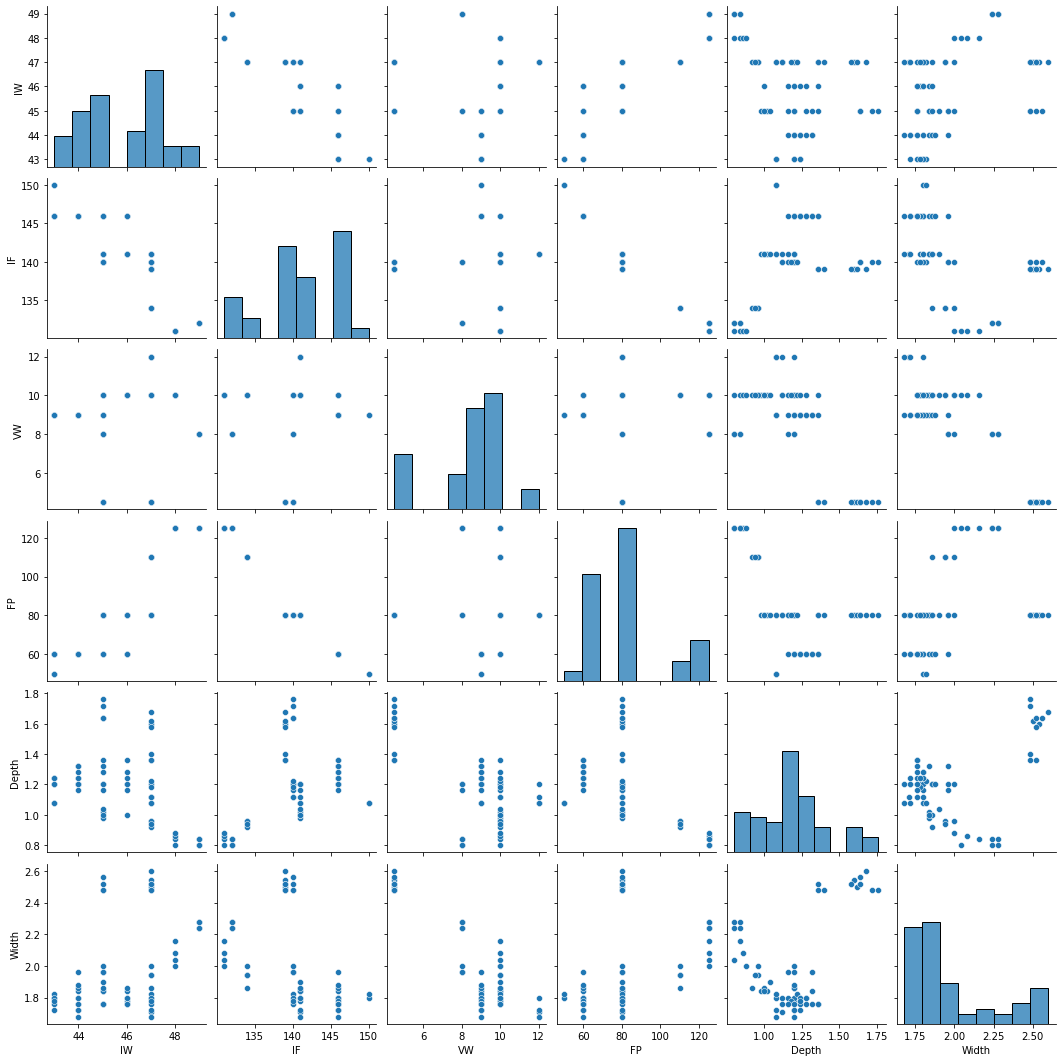

In [15]:
sns.pairplot(df);

In [16]:
df_group = df.groupby([df.IW, df.IF, df.VW, df.FP], as_index=False).mean()

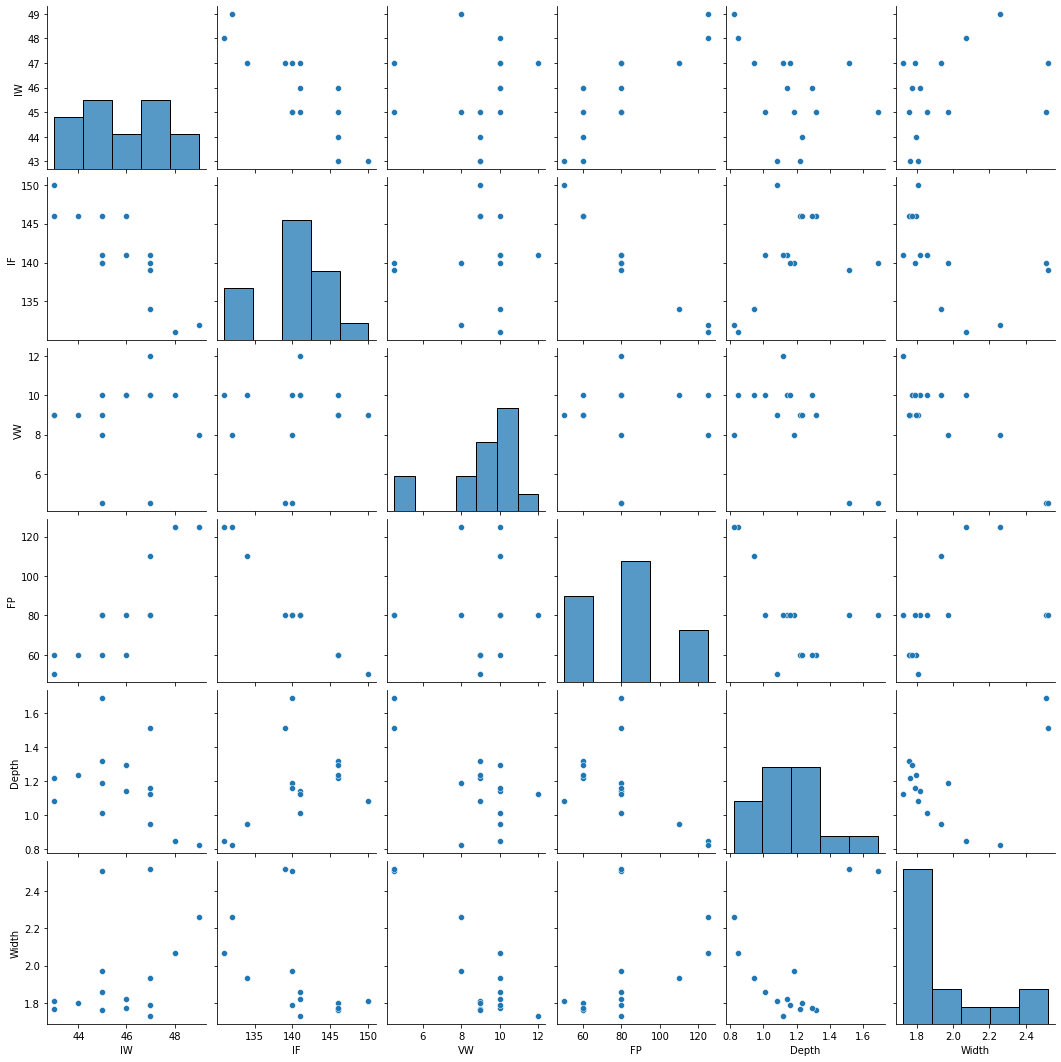

In [17]:
sns.pairplot(df_group);

In [18]:
df.corr()

,IW,IF,VW,FP,Depth,Width
IW,1.000000,-0.859912,-0.015394,0.835915,-0.341494,0.413800
IF,-0.859912,1.000000,0.089630,-0.982079,0.421896,-0.492898
VW,-0.015394,0.089630,1.000000,0.020642,-0.687108,-0.873454
FP,0.835915,-0.982079,0.020642,1.000000,-0.546500,0.394702
Depth,-0.341494,0.421896,-0.687108,-0.546500,1.000000,0.433860
Width,0.413800,-0.492898,-0.873454,0.394702,0.433860,1.000000


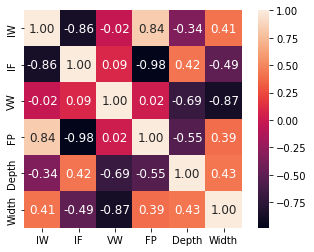

In [21]:
cm = np.corrcoef(df.values.T)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
            annot_kws={'size': 12}, yticklabels=df.columns, xticklabels=df.columns);

Добавим характеристику ускоряющее напряжение и мощность луча по формуле Q = IW * U (сила тока луча на ускоряющее напряжение) 

In [27]:
df['U'] = 20
df['Q'] = df.IW * df.U

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
df.head()

,IW,IF,VW,FP,Depth,Width,U,Q
0,47,139,4.5,80,1.60,2.54,20,940
1,47,139,4.5,80,1.62,2.50,20,940
2,47,139,4.5,80,1.68,2.60,20,940
3,47,139,4.5,80,1.58,2.52,20,940
4,45,140,4.5,80,1.76,2.48,20,900


In [33]:
X = df.drop(['Depth', 'Width'], axis=1).values

In [34]:
X

array([[ 47. , 139. ,   4.5,  80. ,  20. , 940. ],
       [ 47. , 139. ,   4.5,  80. ,  20. , 940. ],
       [ 47. , 139. ,   4.5,  80. ,  20. , 940. ],
       [ 47. , 139. ,   4.5,  80. ,  20. , 940. ],
       [ 45. , 140. ,   4.5,  80. ,  20. , 900. ],
       [ 45. , 140. ,   4.5,  80. ,  20. , 900. ],
       [ 45. , 140. ,   4.5,  80. ,  20. , 900. ],
       [ 45. , 140. ,   4.5,  80. ,  20. , 900. ],
       [ 45. , 140. ,   8. ,  80. ,  20. , 900. ],
       [ 45. , 140. ,   8. ,  80. ,  20. , 900. ],
       [ 45. , 140. ,   8. ,  80. ,  20. , 900. ],
       [ 45. , 141. ,  10. ,  80. ,  20. , 900. ],
       [ 45. , 141. ,  10. ,  80. ,  20. , 900. ],
       [ 45. , 141. ,  10. ,  80. ,  20. , 900. ],
       [ 45. , 141. ,  10. ,  80. ,  20. , 900. ],
       [ 46. , 141. ,  10. ,  80. ,  20. , 920. ],
       [ 46. , 141. ,  10. ,  80. ,  20. , 920. ],
       [ 46. , 141. ,  10. ,  80. ,  20. , 920. ],
       [ 46. , 141. ,  10. ,  80. ,  20. , 920. ],
       [ 47. , 141. ,  12. ,  8

In [38]:
y = df[['Depth', 'Width']].values

In [39]:
y

array([[1.6 , 2.54],
       [1.62, 2.5 ],
       [1.68, 2.6 ],
       [1.58, 2.52],
       [1.76, 2.48],
       [1.72, 2.48],
       [1.64, 2.52],
       [1.64, 2.56],
       [1.2 , 2.  ],
       [1.2 , 1.96],
       [1.16, 1.96],
       [0.98, 1.84],
       [1.02, 1.84],
       [1.04, 1.9 ],
       [1.  , 1.86],
       [1.2 , 1.78],
       [1.  , 1.84],
       [1.2 , 1.86],
       [1.16, 1.8 ],
       [1.12, 1.71],
       [1.08, 1.68],
       [1.2 , 1.8 ],
       [1.08, 1.72],
       [0.96, 2.  ],
       [0.96, 1.94],
       [0.92, 1.86],
       [0.94, 1.94],
       [1.36, 2.52],
       [1.36, 2.48],
       [1.4 , 2.48],
       [0.84, 2.16],
       [0.86, 2.08],
       [0.88, 2.  ],
       [0.8 , 2.04],
       [0.84, 2.28],
       [0.84, 2.24],
       [0.8 , 2.24],
       [0.8 , 2.28],
       [1.12, 1.76],
       [1.22, 1.82],
       [1.12, 1.8 ],
       [1.18, 1.78],
       [1.28, 1.8 ],
       [1.36, 1.76],
       [1.24, 1.76],
       [1.28, 1.8 ],
       [1.32, 1.84],
       [1.24,

Нормализуем данные

In [43]:
scaler = StandardScaler()

In [44]:
scaler.fit(X)

StandardScaler()

In [45]:
X_scal = scaler.transform(X)

In [47]:
X_scal[:5,:]

array([[ 0.74055029, -0.37916057, -2.00293396,  0.        ,  0.        ,
         0.74055029],
       [ 0.74055029, -0.37916057, -2.00293396,  0.        ,  0.        ,
         0.74055029],
       [ 0.74055029, -0.37916057, -2.00293396,  0.        ,  0.        ,
         0.74055029],
       [ 0.74055029, -0.37916057, -2.00293396,  0.        ,  0.        ,
         0.74055029],
       [-0.46284393, -0.18040705, -2.00293396,  0.        ,  0.        ,
        -0.46284393]])

Разбиваем данные для обучения и для тестирования

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_scal, y, train_size=0.8, random_state=42)

Предварительные результаты моделей, далее выберем модель с лучшими результатами и подберем параметры

In [80]:
def test_model(estimator):
  print(estimator,'\n')
  estimator.fit(X_train, y_train)
  y_pred_tr = estimator.predict(X_train)
  y_pred = estimator.predict(X_test)
  print(f'R2 score train: {estimator.score(X_train,y_pred_tr)}')
  print(f'R2 score test: {estimator.score(X_test,y_test)}')
  print(f'mae_train: {mean_absolute_error(y_train, y_pred_tr)}')
  print(f'mse_train: {mean_squared_error(y_train, y_pred_tr)}')
  print(f'mae_test: {mean_absolute_error(y_test, y_pred)}')
  print(f'mse_test: {mean_squared_error(y_test, y_pred)}')
  f, (ax1, ax2) = plt.subplots(1,2)
  ax1.scatter(x=X_test[:,0],y=y_test[:,0])
  ax1.scatter(x=X_test[:,0],y=y_pred[:,0], color='r')
  ax1.set_title('Depth')
  ax2.scatter(x=X_test[:,1],y=y_test[:,1])
  ax2.scatter(x=X_test[:,1],y=y_pred[:,1], color='r')
  ax2.set_title('Width');

In [138]:
knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
lr = LinearRegression()
tree_reg = DecisionTreeRegressor()
mlp = MLPRegressor(hidden_layer_sizes=(500,),max_iter=10000)
rf = RandomForestRegressor(n_estimators=500,n_jobs=-1)

In [139]:
models = [knn,lr,tree_reg,mlp,rf]

KNeighborsRegressor(weights='distance') 

R2 score train: 1.0
R2 score test: 0.9449990447053127
mae_train: 0.03701602564102563
mse_train: 0.002631195512820513
mae_test: 0.04282051282051283
mse_test: 0.0035925128205128213

LinearRegression() 

R2 score train: 1.0
R2 score test: 0.8917284859665566
mae_train: 0.06376922749533025
mse_train: 0.006884226769216503
mae_test: 0.06441435806004744
mse_test: 0.007051020012418384

DecisionTreeRegressor() 

R2 score train: 1.0
R2 score test: 0.9425632997109104
mae_train: 0.03658195970695971
mse_train: 0.002570180860805861
mae_test: 0.043608058608058595
mse_test: 0.0037467905110762237

MLPRegressor(hidden_layer_sizes=(500,), max_iter=10000) 

R2 score train: 1.0
R2 score test: 0.8290728484876064
mae_train: 0.09102718647169022
mse_train: 0.012866367614655604
mae_test: 0.08767721983294277
mse_test: 0.011536305201595178

RandomForestRegressor(n_estimators=500, n_jobs=-1) 

R2 score train: 1.0
R2 score test: 0.9438829886590253
mae_train: 0.03713188607759

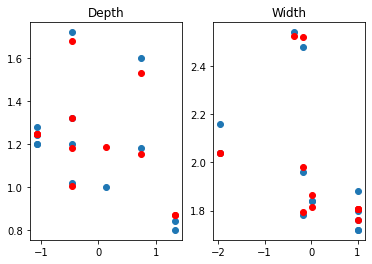

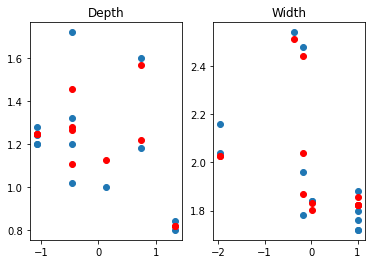

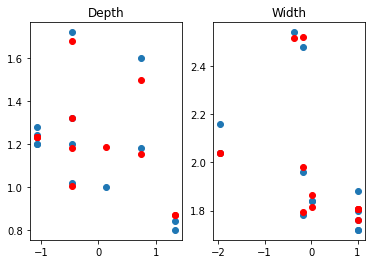

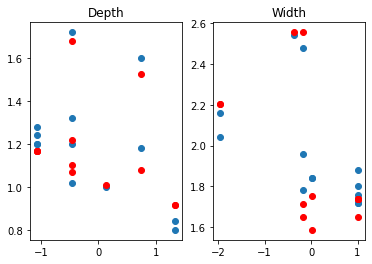

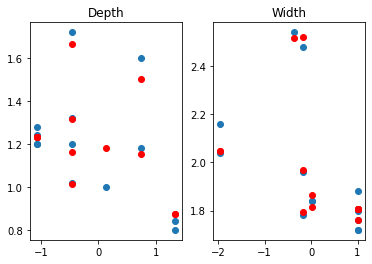

In [140]:
for model in models:
  test_model(model)
  print()

Видим, что лучше всего работают методы основанные на деревьях решений

Кроссвалидация c поиском по сетке для подбора параметров

In [166]:
mae = make_scorer(mean_absolute_error)

In [174]:
params = {
    'n_estimators': [100,300,500,700],
    'max_depth': [1,3,5,7,10],
    'min_samples_leaf': [1,2,3,5]
}

In [175]:
gs = GridSearchCV(RandomForestRegressor(random_state=1), params, scoring=mae, cv=5, n_jobs=-1)

In [176]:
gs.fit(X_scal, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'n_estimators': [100, 300, 500, 700]},
             scoring=make_scorer(mean_absolute_error))

In [177]:
gs.best_estimator_

RandomForestRegressor(max_depth=1, n_estimators=300, random_state=1)

In [178]:
gs.best_score_

0.1928232332737096

Малый обучающий набор данных, поэтому результаты при кроссвалидации отличаются от полученных ранее

Сохраняем модель

In [179]:
import pickle

In [180]:
pickle.dump(gs.best_estimator_, open('model.pkl', 'wb'))